# THREDDS Python Example

Here are a few examples of using HPRCC netCDF data through THREDDS with Python.


## Acquire SPI value for a single point

In [11]:
from siphon.catalog import TDSCatalog
from siphon.http_util import session_manager

%matplotlib inline

import matplotlib.pyplot as plt

cat = TDSCatalog('https://hprcc.unl.edu/thredds/acis/catalog.xml')

ds = cat.datasets['30d.nc']
ncss = ds.subset()

query = ncss.query()
query.lonlat_point(lon=-96.690, lat=40.797)
query.variables('SPI')

nc = ncss.get_data(query)
print('30 Day SPI Value: ', nc['SPI'])

30 Day SPI Value:  [1.34471166]


## Plot SPI for Nebraska

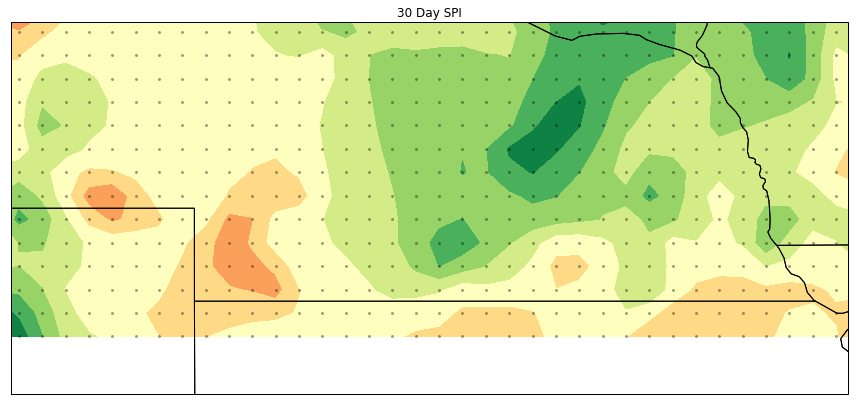

In [14]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

query = ncss.query()
query.lonlat_box(north=43.3, south=39.7, east=-95.0, west=-104.7)
query.accept('netcdf4')
query.variables('SPI')

data = ncss.get_data(query)
spi_var = data.variables['SPI']
lat_var = data.variables['lat']
lon_var = data.variables['lon']

spi_vals = spi_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

fig = plt.figure(figsize=(15,12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-95, -104, 39, 43])

ax.add_feature(cfeature.STATES.with_scale('50m'))

cf = ax.contourf(lon_2d, lat_2d, spi_vals, transform=ccrs.PlateCarree(), zorder=0, cmap='RdYlGn')

ax.set_title('30 Day SPI')

ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2, alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')